<a href="https://colab.research.google.com/github/jcdevaney/audioAnalysisWorkshop/blob/master/audioAnalysisWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files from Git repository

In [1]:
!git clone https://github.com/jcdevaney/audioAnalysisWorkshop.git

Cloning into 'audioAnalysisWorkshop'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 61 (delta 17), reused 20 (delta 4), pack-reused 14
Receiving objects: 100% (61/61), 27.28 MiB | 25.19 MiB/s, done.
Resolving deltas: 100% (18/18), done.


# Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

# Define a function to plot a spectrogram with an overlay data exported from a VAMP plugin

In [3]:
def overlayPlot(audiofile,dataDF,title):
    # open audio file
    y, fs = librosa.load(audiofile)

    # run the short time fourier transform
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a figure and primary axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Display the spectrogram on the left y-axis
    librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
    ax1.set_ylabel('Spectrogram Power (dB)', color='tab:red')

    # Create a secondary y-axis and plot the time series on it
    ax2 = ax1.twinx()
    ax2.plot(dataDF['Time'], dataDF['Data'], label='Time Series', color='tab:blue')
    ax2.set_ylabel('Energy', color='tab:blue')

    # Add a colorbar for the spectrogram
    cbar = plt.colorbar(format='%+2.0f dB', ax=ax1)
    cbar.set_label('Power (dB)')

    plt.title(title)
    plt.show()


# Load and examine a VAMP plugin csv file

In [4]:
# load CSV file, adding column names for time and data
csvEx = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
csvEx

,Time,Data
0,0.000000,0.001507
1,0.023220,0.001074
2,0.046440,0.001062
3,0.069660,0.000845
4,0.092880,0.000870
...,...,...
489,11.354558,0.001692
490,11.377778,0.001666
491,11.400998,0.002047
492,11.424218,0.002216


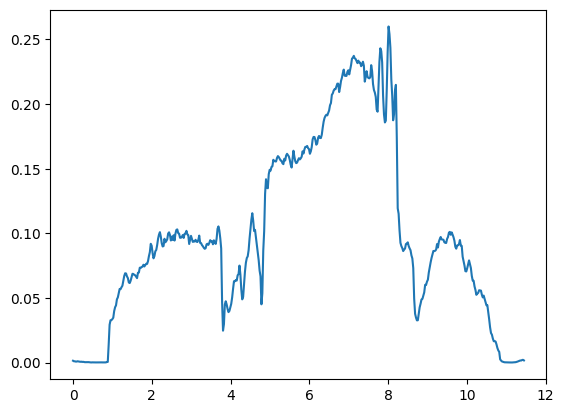

In [5]:
# plot the imported CSV data, using the time values for the x-axis
plt.plot(csvEx['Time'],csvEx['Data'])

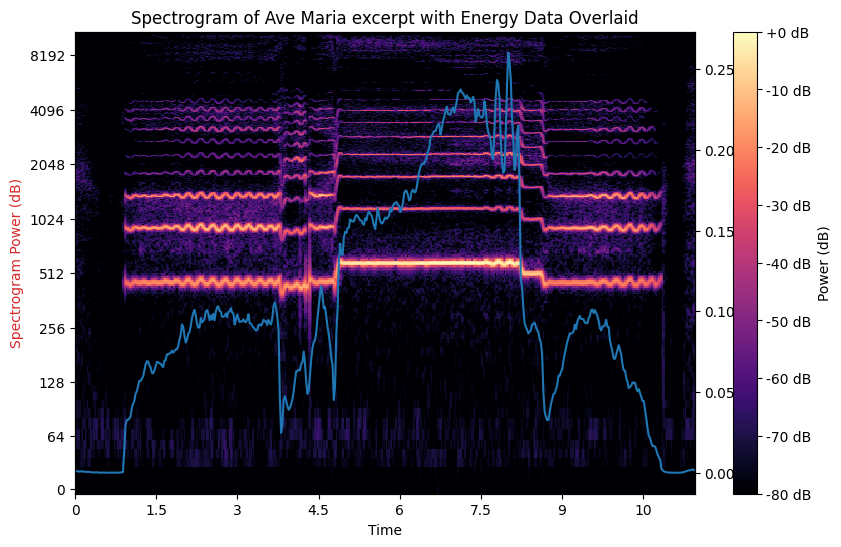

In [6]:
# plot the imported CSV data over a spectrogram of the correspponding audio
audiofileEX = '/content/audioAnalysisWorkshop/audio/avm.wav'
titleEX = 'Spectrogram of Ave Maria excerpt with Energy Data Overlaid'
overlayPlot(audiofileEX,csvEx,titleEX)

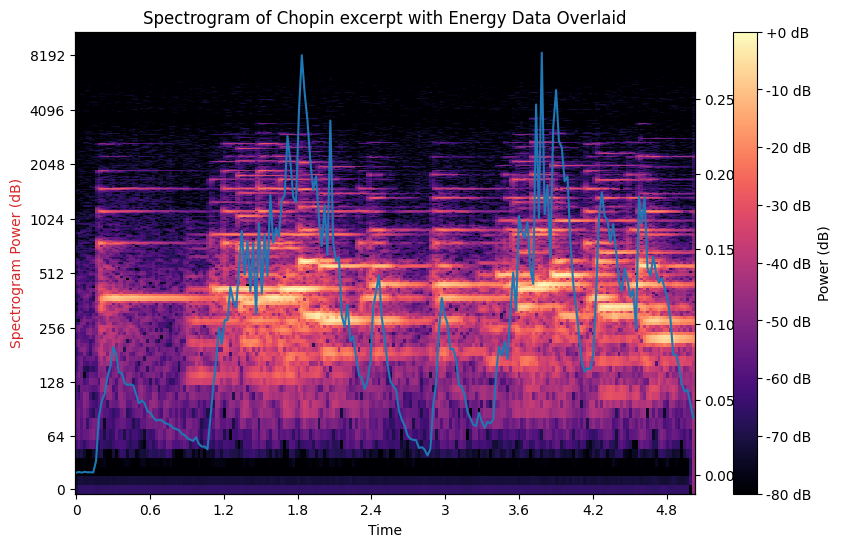

In [7]:
audiofileChopin = '/content/audioAnalysisWorkshop/audio/chopinSeg.wav'
csvChopin = pd.read_csv('/content/audioAnalysisWorkshop/audio/chopinSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleChopin = 'Spectrogram of Chopin excerpt with Energy Data Overlaid'

overlayPlot(audiofileChopin,csvChopin,titleChopin)

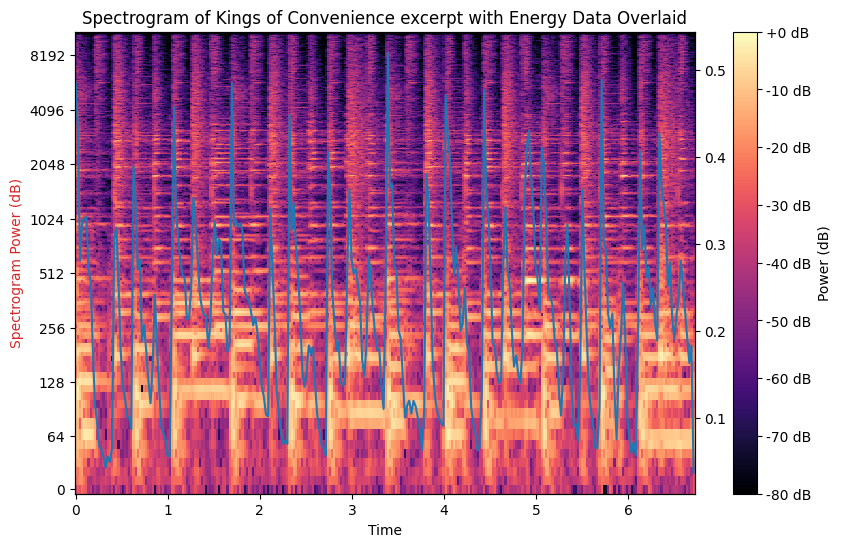

In [8]:
audiofileKings = '/content/audioAnalysisWorkshop/audio/kingsLoop.wav'
csvKings = pd.read_csv('/content/audioAnalysisWorkshop/audio/kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleKings = 'Spectrogram of Kings of Convenience excerpt with Energy Data Overlaid'

overlayPlot(audiofileKings,csvKings,titleKings)

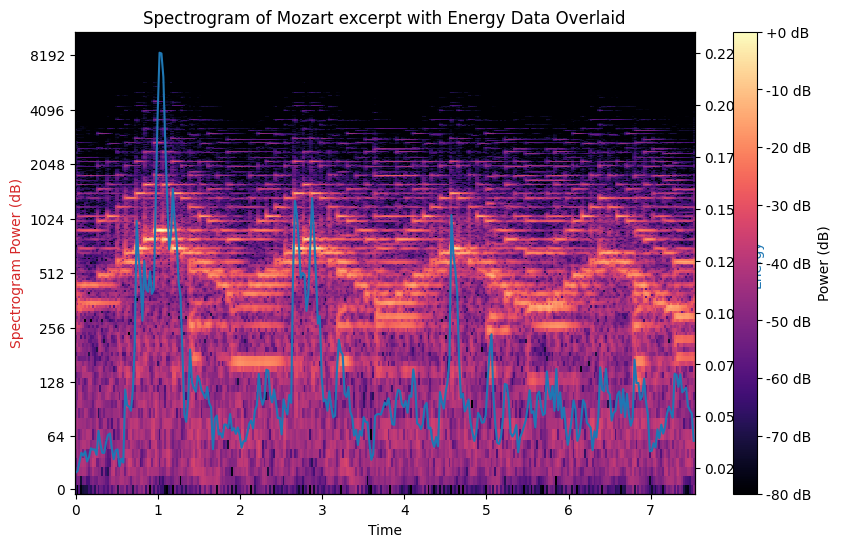

In [9]:
audiofileMozart = '/content/audioAnalysisWorkshop/audio/mozartSeg.wav'
csvMozart = pd.read_csv('/content/audioAnalysisWorkshop/audio/mozartSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleMozart = 'Spectrogram of Mozart excerpt with Energy Data Overlaid'

overlayPlot(audiofileMozart,csvMozart,titleMozart)

# Plot F0 data imported from Sonic Visualiser

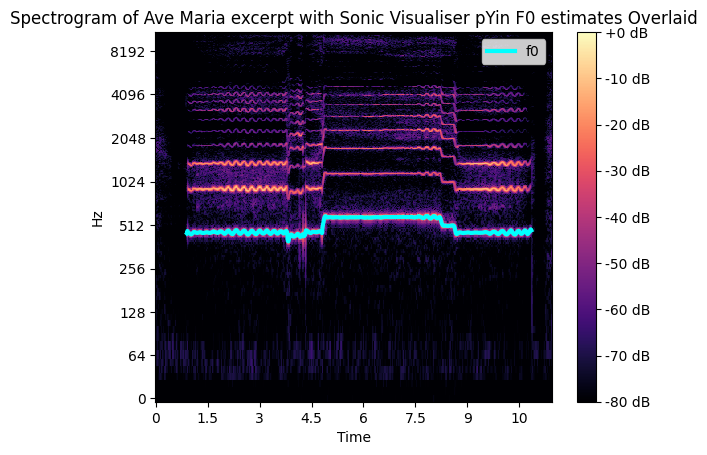

In [10]:
y, fs = librosa.load(audiofileEX)
avmF0 = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_pYinF0.csv',names=['Time','Data'])

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Spectrogram of Ave Maria excerpt with Sonic Visualiser pYin F0 estimates Overlaid')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(avmF0['Time'], avmF0['Data'], label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

# Plot F0 data from pyin in librosa

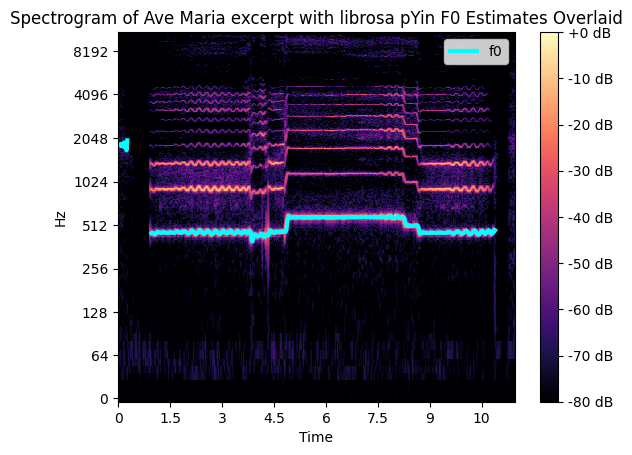

In [11]:
# https://librosa.org/doc/main/generated/librosa.pyin.html

f0, voiced_flag, voiced_probs = librosa.pyin(y,sr=fs, frame_length=2048, win_length=256,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Spectrogram of Ave Maria excerpt with librosa pYin F0 Estimates Overlaid')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')


# Load time point data

In [12]:
avmQMULonsets = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_qmulOnsets.csv',names=['Time'])
avmTimeInsants = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_timeInstants.csv',names=['Time','Label'])
avmRegions = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_regions.csv',names=['Time','Dummy','Offset','Label'])
avmAudacity = pd.read_table('/content/audioAnalysisWorkshop/audio/avm_audacityLabels.txt',names=['Time','Offset','Label'])

# Plot time points over spectrogram

In [13]:
def plotTimePoints(D,sr,times):

  # plot spectrogram
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')

  # Let's draw transparent lines over the beat frames
  plt.vlines(times,
            1, 0.5 * sr,
            colors='w', linestyles='-', linewidth=2, alpha=0.5)

  plt.axis('tight')

  plt.colorbar(format='%+02.0f dB')

  plt.tight_layout()

# Plot the manual annotations

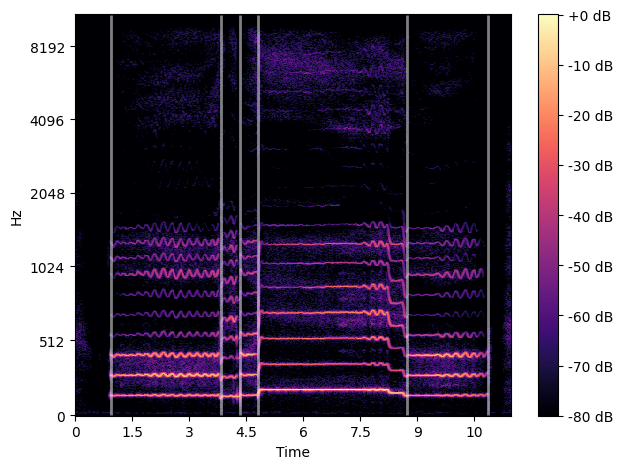

In [14]:
# Sonic Visualiser Time Instants
plotTimePoints(D,fs,avmTimeInsants['Time'])

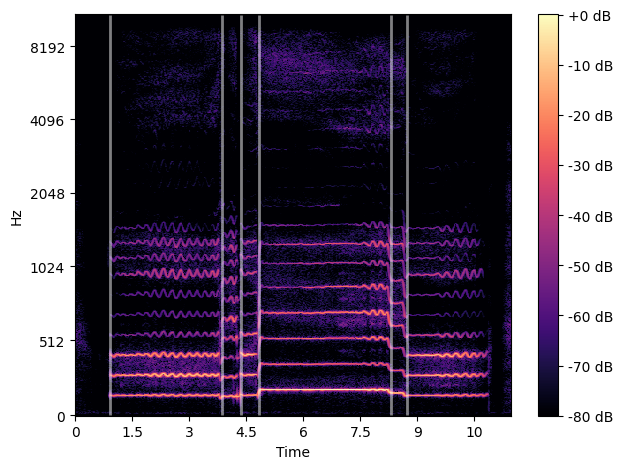

In [15]:
# Sonic Visualiser Regions
plotTimePoints(D,fs,avmRegions['Time'])

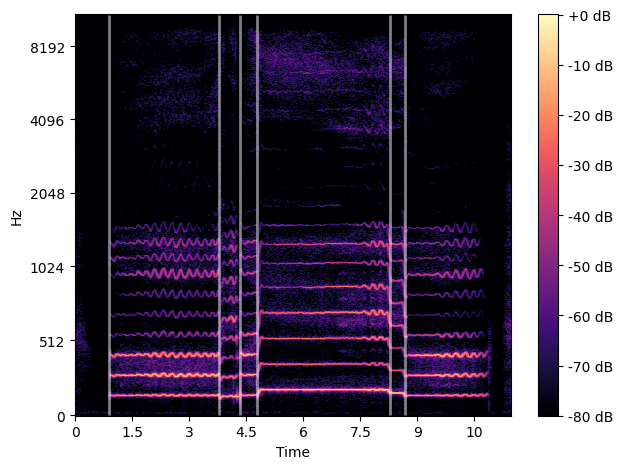

In [16]:
# Audacity
plotTimePoints(D,fs,avmAudacity['Time'])

# Plot Onset Estimates

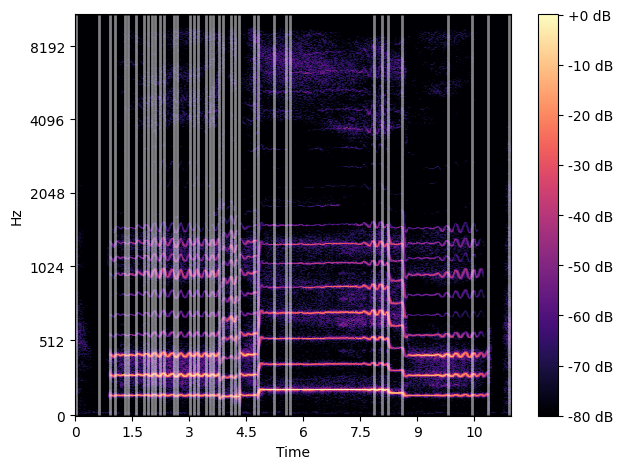

In [17]:
# Queen Mary VAMP plugin
plotTimePoints(D,fs,avmQMULonsets['Time'])

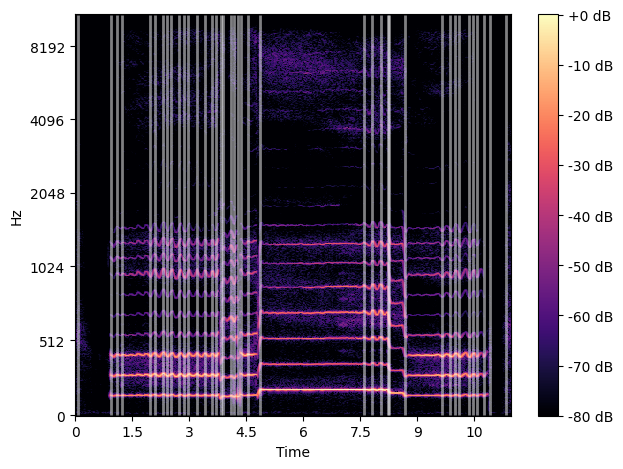

In [18]:
# librosa
onsets = librosa.onset.onset_detect(y=y,sr=fs, units='time')
plotTimePoints(D,fs,onsets)

# Index into F0 estimates for each note and calculate the mean

In [19]:
noteF0vals = []
noteF0mean = []
for i in range(6):
  idx1 = (np.abs(avmF0['Time'] - avmAudacity['Time'][i])).argmin()
  idx2 = (np.abs(avmF0['Time'] - avmAudacity['Offset'][i])).argmin()
  noteF0vals.append(avmF0['Data'][idx1:idx2])
  noteF0mean.append(np.mean(noteF0vals[i]))
print(noteF0mean)

[456.4422756539235, 432.7728085106383, 460.52378749999997, 578.4695049833887, 504.42812121212125, 455.012284574468]
